In [1]:
import xgboost
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import random

In [2]:
def getInputOutputFolder(fileFlag=None):
    f  = open("data_file.txt", "r")
    i  = 0
    for l in f.readlines():
        if fileFlag<32:
            if i==fileFlag:
                foldName = l[:-1]
        if fileFlag==32:
            if i==fileFlag:
                foldName = l
        
        i = i+1
    f.close()
    dataNameSplit = foldName.split("/")
    inputFileName  = '../../data/'+ dataNameSplit[1]+'/inputs.csv'
    outputFileName = '../../data/'+ dataNameSplit[1]+'/outputs.csv'
    foldName       = '../../'+foldName
    return inputFileName,outputFileName,foldName,dataNameSplit[1]

In [18]:
# Input the File Number
# Not Working - 17,18,19,20,21,22,23,24,25
fileFlag = 6
inputFileName,outputFileName,foldName,dataName = getInputOutputFolder(fileFlag)
print(inputFileName)
print(outputFileName)
print(foldName)
print(dataName)

../../data/H3K36me3_AM_immune/inputs.csv
../../data/H3K36me3_AM_immune/outputs.csv
../../data/H3K36me3_AM_immune/cv/equal_labels/folds.csv
H3K36me3_AM_immune


In [19]:
input      = pd.read_csv(inputFileName)
label      = pd.read_csv(outputFileName)
folds      = pd.read_csv(foldName)
folds_iter = folds['fold'].unique()
print(folds_iter)
input.replace([np.inf, -np.inf], np.nan,inplace=True)

[2 1 3 4]


In [20]:
colnames       = input.columns.values
colnamesSeries = input.isna().sum()
nullColnames   = list(colnamesSeries.index[colnamesSeries>0].values)
nullColnames.append('sequenceID')
colnames       = [x for x in colnames if x not in nullColnames]

In [21]:
def chart_creation_xgboost(res,chart_title,chart_name,distribution,parameter):
    
    distributionCol = distribution + ","+str(parameter)
    min_valid = round(np.min(res['test'][distributionCol]),4)
    min_train = round(np.min(res['train'][distributionCol]),4)
    min_iter  = round(np.nanargmin(res['test'][distributionCol]),0)

    textstr = '\n'.join((
                    'Min Train = %.2f' % (min_train, ),
                    'Min Valid = %.2f' % (min_valid, ),
                    'Min Iter  = %.2f' % (min_iter, )))

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5,edgecolor="black")
    
    fig,ax1       = plt.subplots()
    ax2           = ax1.twinx()

    ln1 = ax1.plot(res['train'][distributionCol],color='blue',label='Training')
    ln2 = ax2.plot(res['test'][distributionCol],color='orange',label='Validation')
    
    lns = ln1 + ln2
    
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='lower left',fancybox='round', facecolor='wheat',fontsize=8)
    
    ax1.set_xlabel("Number of Iterations(Trees)")
    ax1.set_ylabel("Training Negative Likelihood(Loss)")
    ax2.set_ylabel("Validation Negative Likelihood(Loss)")
    ax2.text(0.7, 0.90, textstr, transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
    plt.title(chart_title)
    plt.show()
    fig.savefig(chart_name)
    
def generate_result(X,y_lower,y_higher,params,X_val=None,y_lower_val=None,y_higher_val=None):
    
    res    = {}
    dtrain = xgboost.DMatrix(X)
    dtrain.set_float_info("label_lower_bound",y_lower)
    dtrain.set_float_info("label_upper_bound",y_higher)
    
    dtest  = xgboost.DMatrix(X_val)
    dtest.set_float_info("label_lower_bound",y_lower_val)
    dtest.set_float_info("label_upper_bound",y_higher_val)
    
    bst    = xgboost.train(params,dtrain,num_boost_round=100,evals=[(dtrain,"train"),(dtest,"test")],evals_result=res)
    return res

In [16]:
def calculateSummaryStats(data):
    data     = list(filter(lambda x : x not in [float('inf'),-float('inf')],data))
    std      = np.std(data)
    avg      = np.mean(data)
    return std,avg

[0]	train-logistic,2:3.59484	test-logistic,2:3.54397
[1]	train-logistic,2:3.59484	test-logistic,2:3.54397
[2]	train-logistic,2:3.59484	test-logistic,2:3.54397
[3]	train-logistic,2:3.59484	test-logistic,2:3.54397
[4]	train-logistic,2:3.59484	test-logistic,2:3.54397
[5]	train-logistic,2:3.59484	test-logistic,2:3.54397
[6]	train-logistic,2:3.59484	test-logistic,2:3.54397
[7]	train-logistic,2:3.59484	test-logistic,2:3.54397
[8]	train-logistic,2:3.59484	test-logistic,2:3.54397
[9]	train-logistic,2:3.59484	test-logistic,2:3.54397
[10]	train-logistic,2:3.59484	test-logistic,2:3.54397
[11]	train-logistic,2:3.59484	test-logistic,2:3.54397
[12]	train-logistic,2:3.59484	test-logistic,2:3.54397
[13]	train-logistic,2:3.59484	test-logistic,2:3.54397
[14]	train-logistic,2:3.59484	test-logistic,2:3.54397
[15]	train-logistic,2:3.59484	test-logistic,2:3.54397
[16]	train-logistic,2:3.59484	test-logistic,2:3.54397
[17]	train-logistic,2:3.59484	test-logistic,2:3.54397
[18]	train-logistic,2:3.59484	test-log

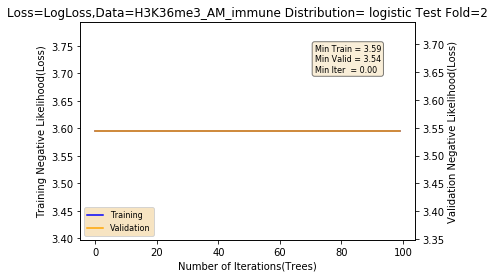

[0]	train-logistic,2:3.58894	test-logistic,2:3.55326
[1]	train-logistic,2:3.58894	test-logistic,2:3.55326
[2]	train-logistic,2:3.58894	test-logistic,2:3.55326
[3]	train-logistic,2:3.58894	test-logistic,2:3.55326
[4]	train-logistic,2:3.58894	test-logistic,2:3.55326
[5]	train-logistic,2:3.58894	test-logistic,2:3.55326
[6]	train-logistic,2:3.58894	test-logistic,2:3.55326
[7]	train-logistic,2:3.58894	test-logistic,2:3.55326
[8]	train-logistic,2:3.58894	test-logistic,2:3.55326
[9]	train-logistic,2:3.58894	test-logistic,2:3.55326
[10]	train-logistic,2:3.58894	test-logistic,2:3.55326
[11]	train-logistic,2:3.58894	test-logistic,2:3.55326
[12]	train-logistic,2:3.58894	test-logistic,2:3.55326
[13]	train-logistic,2:3.58894	test-logistic,2:3.55326
[14]	train-logistic,2:3.58894	test-logistic,2:3.55326
[15]	train-logistic,2:3.58894	test-logistic,2:3.55326
[16]	train-logistic,2:3.58894	test-logistic,2:3.55326
[17]	train-logistic,2:3.58894	test-logistic,2:3.55326
[18]	train-logistic,2:3.58894	test-log

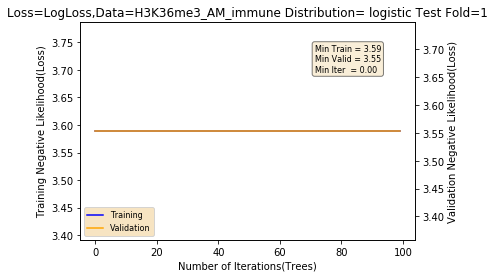

[0]	train-logistic,2:3.62372	test-logistic,2:3.48358
[1]	train-logistic,2:3.62372	test-logistic,2:3.48358
[2]	train-logistic,2:3.62372	test-logistic,2:3.48358
[3]	train-logistic,2:3.62372	test-logistic,2:3.48358
[4]	train-logistic,2:3.62372	test-logistic,2:3.48358
[5]	train-logistic,2:3.62372	test-logistic,2:3.48358
[6]	train-logistic,2:3.62372	test-logistic,2:3.48358
[7]	train-logistic,2:3.62372	test-logistic,2:3.48358
[8]	train-logistic,2:3.62372	test-logistic,2:3.48358
[9]	train-logistic,2:3.62372	test-logistic,2:3.48358
[10]	train-logistic,2:3.62372	test-logistic,2:3.48358
[11]	train-logistic,2:3.62372	test-logistic,2:3.48358
[12]	train-logistic,2:3.62372	test-logistic,2:3.48358
[13]	train-logistic,2:3.62372	test-logistic,2:3.48358
[14]	train-logistic,2:3.62372	test-logistic,2:3.48358
[15]	train-logistic,2:3.62372	test-logistic,2:3.48358
[16]	train-logistic,2:3.62372	test-logistic,2:3.48358
[17]	train-logistic,2:3.62372	test-logistic,2:3.48358
[18]	train-logistic,2:3.62372	test-log

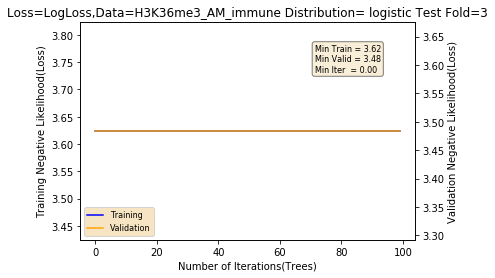

[0]	train-logistic,2:2.09506	test-logistic,2:2.28346
[1]	train-logistic,2:1.76095	test-logistic,2:1.94535
[2]	train-logistic,2:1.55274	test-logistic,2:1.73442
[3]	train-logistic,2:1.40762	test-logistic,2:1.58749
[4]	train-logistic,2:1.30087	test-logistic,2:1.4796
[5]	train-logistic,2:1.21986	test-logistic,2:1.39797
[6]	train-logistic,2:1.15716	test-logistic,2:1.33503
[7]	train-logistic,2:1.10796	test-logistic,2:1.28589
[8]	train-logistic,2:1.06881	test-logistic,2:1.24725
[9]	train-logistic,2:1.03756	test-logistic,2:1.21662
[10]	train-logistic,2:1.0124	test-logistic,2:1.19172
[11]	train-logistic,2:0.99203	test-logistic,2:1.17211
[12]	train-logistic,2:0.975469	test-logistic,2:1.15667
[13]	train-logistic,2:0.961723	test-logistic,2:1.1437
[14]	train-logistic,2:0.950596	test-logistic,2:1.13311
[15]	train-logistic,2:0.940824	test-logistic,2:1.12605
[16]	train-logistic,2:0.932953	test-logistic,2:1.11871
[17]	train-logistic,2:0.926541	test-logistic,2:1.11302
[18]	train-logistic,2:0.920569	test

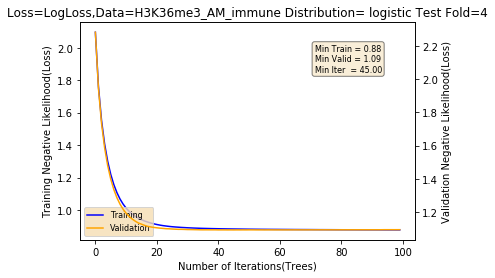

In [24]:
for i in folds_iter:
    
    distribution = 'logistic'
    test_fold    = i
    test_id      = folds[folds["fold"]==i]['sequenceID']
    train_id     = folds[folds["fold"]!=i]['sequenceID']
    
    nullId       = label[(label['min.log.lambda']==-float('inf'))&(label['max.log.lambda']==float('inf'))]['sequenceID']
    X            = input[input['sequenceID'].isin(train_id)&(~input['sequenceID'].isin(nullId))]
    X_val        = input[input['sequenceID'].isin(test_id)&(~input['sequenceID'].isin(nullId))]
    X            = X[colnames]
    X_val        = X_val[colnames]
    y_label      = label[label['sequenceID'].isin(train_id)&(~label['sequenceID'].isin(nullId))]
    y_label_test = label[label['sequenceID'].isin(test_id)&(~label['sequenceID'].isin(nullId))]
    
    std_higher,avg_higher = calculateSummaryStats(y_label['max.log.lambda'].copy())
    std_lower,avg_lower   = calculateSummaryStats(y_label['min.log.lambda'].copy())
    
    std_cal        = round((std_higher+std_lower)/2,2)
    sigma          = 2
    base_score_cal = (avg_higher+avg_lower)/2
    base_score     = base_score_cal
    
    distributionCol = distribution+ ',' + str(sigma)
    y_lower      = np.array(list(map(lambda x: x if x == float('inf') else np.exp(x),y_label['min.log.lambda'])))
    y_higher     = np.array(list(map(lambda x: x if x == float('inf') else np.exp(x),y_label['max.log.lambda'])))
    y_lower_val  = np.array(list(map(lambda x: x if x == float('inf') else np.exp(x),y_label_test['min.log.lambda'])))
    y_higher_val = np.array(list(map(lambda x: x if x == float('inf') else np.exp(x),y_label_test['max.log.lambda'])))
    
    data_name    = dataName
    title        = 'Loss=LogLoss,Data='+data_name+' Distribution= '+distribution+' Test Fold='+str(test_fold)
    file_name    = title+'.png'
    
    eval_metric  = 'aft-nloglik@'+distributionCol
    
    params = {'learning_rate':0.1, 'aft_noise_distribution' : distribution, 'aft_sigma': sigma,'eval_metric':eval_metric,'base_score':base_score,'objective':"aft:survival"}
    bst    = generate_result(X,y_lower,y_higher,params,X_val,y_lower_val,y_higher_val)
    chart_creation_xgboost(bst,title,file_name,distribution,sigma)